In [1]:
from math import factorial
import matplotlib.pyplot as plt
import numpy as np

# 1. Round-off and Truncation Error

Define functions

In [32]:
# given function
def f(x):
    return x**2 - 4*x - 6

# BISECTION METHOD
def bisection(x0,x1,eps,maxStep=1e5):
    i = 1
    step = []
    error = []
    condition = True
    
    while condition:
        xMid = (x0 + x1)/2
        
        if f(x0)*f(xMid) < 0:
            x1 = xMid
        else:
            x0 = xMid

        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break

        step.append(i)
        error.append(abs(f(xMid)))
        i += 1
        condition = abs(f(xMid)) > eps
    
    print('*** BISECTION METHOD ***')
    print(f'iterations: {i}')
    print(f'estimate: {f(xMid)}\n\n')

    return step, error

# SECANT METHOD
def secant(x0,x1,eps,maxStep=1e5):
    i = 1
    step = []
    error = []
    condition = True

    while condition:
        if f(x0) == f(x1):
            break

        xMid = x0 - (x1-x0)*f(x0) / (f(x1)-f(x0))
        x0 = x1
        x1 = xMid

        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break
        
        step.append(i)
        error.append(abs(f(xMid)))
        i += 1
        condition = abs(f(xMid)) > eps
    
    print('*** SECANT METHOD ***')
    print(f'iterations: {i}')
    print(f'estimate: {f(xMid)}\n\n')

    return step, error

# REGULA-FALSI METHOD
def regulaFalsi(x0,x1,eps,maxStep=1e5):
    i = 1
    step = []
    error = []
    condition = True

    while condition:
        if f(x0) == f(x1):
            break

        xMid = x0 - (x1-x0)*f(x0) / (f(x1)-f(x0))

        if f(x0)*f(xMid) < 0:
            x1 = xMid
        else:
            x0 = xMid

        if i > maxStep:
            print(f'Not Convergent within {maxStep} iterations')
            break
        
        step.append(i)
        error.append(abs(f(xMid)))
        i += 1
        condition = abs(f(xMid)) > eps
    
    print('*** REGULA-FALSI METHOD ***')
    print(f'iterations: {i}')
    print(f'estimate: {f(xMid)}\n\n')

    return step, error

Plotting

*** BISECTION METHOD ***
iterations: 16
estimate: 0.00047975778579711914


*** SECANT METHOD ***
iterations: 8
estimate: -4.181529700275632e-06


*** REGULA-FALSI METHOD ***
iterations: 12
estimate: -0.000446902423962392




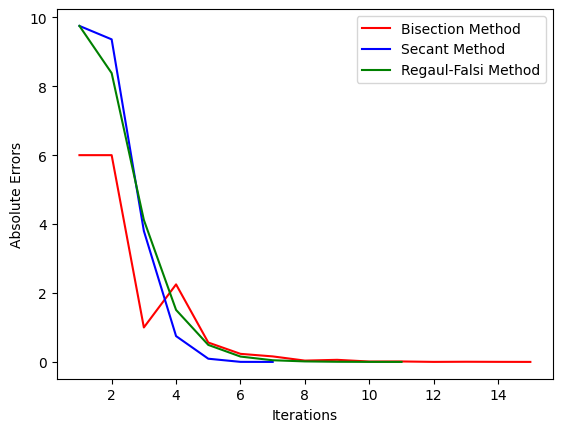

In [36]:
eps = 0.001
x0 = -4
x1 = 4

s1,e1 = bisection(x0,x1,eps)
s2,e2 = secant(x0,x1,eps)
s3,e3 = regulaFalsi(x0,x1,eps)

plt.plot(s1,e1,'r',label='Bisection Method')
plt.plot(s2,e2,'b',label='Secant Method')
plt.plot(s3,e3,'g',label='Regaul-Falsi Method')
plt.xlabel('Iterations')
plt.ylabel('Absolute Errors')
plt.legend()
plt.show()

# 2. Round-off Error

In [41]:
x = 1.35

fa1 = 2.32*x**3 + 2.08*x**2 - 4.86*x + 8.33
fa2 = round(round(2.32*round(x**3,3),3) + round(2.08*round(x**2,3),3) - round(4.86*x,3) + 8.33,3)
fb1 = (((2.32*x) + 2.08)*x - 4.86)*x + 8.33
fb2 = round(round(round(round(2.32*x,3) + 2.08,3)*x - 4.86,3)*x + 8.33,3)

print('*** PART A ***')
print(f'Using default machine precision:  {fa1}')
print(f'Rounding to 3 significant digits: {fa2}\n')

print('*** PART B ***')
print(f'Using default machine precision:  {fb1}')
print(f'Rounding to 3 significant digits: {fb2}')

*** PART A ***
Using default machine precision:  11.267869999999998
Rounding to 3 significant digits: 11.268

*** PART B ***
Using default machine precision:  11.26787
Rounding to 3 significant digits: 11.268


# 3. Truncation Error

Evaluate the function to 4 digits of precision:
Part A: -1.0952
Part B: 0.0193


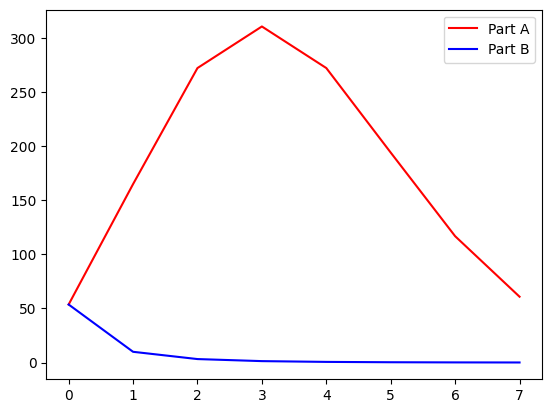

In [50]:
truth = np.exp(-4)

sum1, sum2 = 0, 0
val1, val2 = [], []
absErr1, absErr2 = [], []
relErr1, relErr2 = [], []

for k in range(8):
    term1 = (-1)**k * 4**k / factorial(k)
    term2 = 4**k / factorial(k)

    sum1 += term1
    sum2 += term2

    val1.append(sum1)
    val2.append(1/sum2)
    absErr1.append(abs(truth-sum1))
    absErr2.append(abs(truth-1/sum2))
    relErr1.append(abs(truth-sum1) / truth)
    relErr2.append(abs(truth-1/sum2) / truth)

print('Evaluate the function to 4 digits of precision:')
print(f'Part A: {round(val1[-1],4)}')
print(f'Part B: {round(val2[-1],4)}')

plt.plot(relErr1,'r',label='Part A')
plt.plot(relErr2,'b',label='Part B')
plt.legend()
plt.show()